In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from pathlib import Path
from PIL import Image
from datetime import date
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
import argparse

In [43]:
tf.config.list_physical_devices('GPU')
BASE_LOG_PATH = './logs_bede/'
BATCH_SIZE = 32
LAST_TRAINABLE_LAYERS = 8
LR = 0.0001
MODEL_TYPE = 'classification'
TIME = str(date.today()).replace(" ", "-")
LOG_DIR = f"{BASE_LOG_PATH}{MODEL_TYPE}/{TIME}_imdb_ bede_batch_{BATCH_SIZE}_lr_{LR}_2p_layers_{LAST_TRAINABLE_LAYERS}"
print(f"Logging to {LOG_DIR}")
tensorboard_callback = TensorBoard(log_dir=LOG_DIR)

Logging to ./logs_bede/classification/2021-02-28_imdb_ bede_batch_32_lr_0.0001_2p_layers_8


In [44]:
labels = pd.read_csv('imdb_wiki_csv_processed.csv')
labels = labels.astype({"image": 'string'})


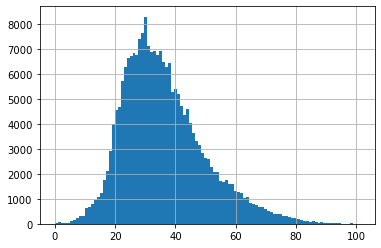

In [45]:
histogram_age = labels['age'].hist(bins=labels['age'].nunique())

In [77]:
display(labels)

,Unnamed: 0,image,age,partition,imagepath,image_pixels
0,0,10000217_1981-05-05_2009_27.jpg,27,train,../data/imdb_wiki_processed/10000217_1981-05-0...,[255. 255. 255. ... 27. 78. 143.]
1,1,100012_1948-07-03_2008_59.jpg,59,train,../data/imdb_wiki_processed/100012_1948-07-03_...,[92. 97. 91. ... 30. 31. 35.]
2,2,10002116_1971-05-31_2012_40.jpg,40,train,../data/imdb_wiki_processed/10002116_1971-05-3...,[ 61. 30. 10. ... 255. 237. 231.]
3,3,10002702_1960-11-09_2012_50.jpg,50,train,../data/imdb_wiki_processed/10002702_1960-11-0...,[ 97. 122. 178. ... 83. 112. 168.]
4,4,10003541_1937-09-27_1971_32.jpg,32,train,../data/imdb_wiki_processed/10003541_1937-09-2...,[190. 189. 194. ... 104. 103. 99.]
...,...,...,...,...,...,...
224559,224559,nm7153885_rm1455090176_1990-8-15_2015_24.jpg,24,valid,../data/imdb_wiki_processed/nm7153885_rm145509...,[ 18. 16. 21. ... 237. 211. 162.]
224560,224560,nm7153885_rm2857825792_1990-8-15_2015_24.jpg,24,valid,../data/imdb_wiki_processed/nm7153885_rm285782...,[93. 79. 66. ... 85. 57. 36.]
224561,224561,nm7153885_rm3065702912_1990-8-15_2015_24.jpg,24,valid,../data/imdb_wiki_processed/nm7153885_rm306570...,[ 70. 68. 71. ... 150. 95. 65.]
224562,224562,nm7153885_rm4089047552_1990-8-15_2015_24.jpg,24,valid,../data/imdb_wiki_processed/nm7153885_rm408904...,[ 64. 54. 52. ... 235. 180. 126.]


In [41]:
def img_to_raw_pixels(file_path):
    img = image.load_img(file_path, grayscale=False, target_size=(224, 224))
    x = image.img_to_array(img).reshape(1, -1)[0]
    return x

In [7]:
labels['image_pixels'] = labels['imagepath'].apply(img_to_raw_pixels)

MemoryError: Unable to allocate 588. KiB for an array with shape (224, 224, 3) and data type float32

In [47]:
target = labels['age'].values

In [49]:
target_classes = keras.utils.to_categorical(target, 102)

In [90]:
features = []
for i in range(0, labels.shape[0]):
    features.append(labels['image_pixels'].values[i])

features = np.array(features)
display(features[0])
features = features.reshape(features.shape[0], 224, 224, 3)

'[255. 255. 255. ...  27.  78. 143.]'

ValueError: cannot reshape array of size 224564 into shape (224564,224,224,3)